In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('final_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,cases
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,2
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,4,0


In [3]:
df.shape

(174103, 25)

In [4]:
# Total no of duplicate rows
df.duplicated().sum()

71058

In [5]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [6]:
df.shape

(103045, 25)

In [7]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'year', 'month', 'cases'],
      dtype='object')

## Feature Scaling 

In [8]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

In [9]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
scaler.fit(df[feature_scale])

RobustScaler()

In [10]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['cases','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [11]:
data.head()

,cases,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,density_per_km,precipMM
0,2,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,51.174569,-0.336842
1,0,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,51.174569,-0.336842
2,1,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,51.174569,-0.336842
3,0,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,51.174569,-0.336842
4,1,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,51.174569,-0.336842


In [12]:
X = data.iloc[:,1:]  #independent columns
y = data['cases'] #dependent column

## 1. ExtraTreesRegressor

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
model.feature_importances_

array([9.24875248e-02, 1.09268642e-01, 3.66360846e-02, 3.56707485e-02,
       4.47292732e-06, 3.95377342e-02, 2.93804350e-02, 3.29963115e-02,
       3.56604238e-02, 2.65935368e-02, 2.34548159e-02, 2.35687138e-02,
       3.53609259e-02, 3.52110035e-02, 3.66760855e-02, 3.50676382e-02,
       3.77793957e-02, 1.19477767e-02, 3.63749083e-02, 4.46767357e-02,
       3.41426082e-02, 7.97990870e-02, 1.09813251e-01, 1.78911402e-02])

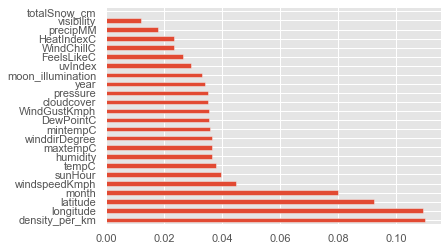

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [16]:
print(feat_importances.nlargest(24))

density_per_km       0.109813
longitude            0.109269
latitude             0.092488
month                0.079799
windspeedKmph        0.044677
sunHour              0.039538
tempC                0.037779
humidity             0.036676
maxtempC             0.036636
winddirDegree        0.036375
mintempC             0.035671
DewPointC            0.035660
WindGustKmph         0.035361
cloudcover           0.035211
pressure             0.035068
year                 0.034143
moon_illumination    0.032996
uvIndex              0.029380
FeelsLikeC           0.026594
WindChillC           0.023569
HeatIndexC           0.023455
precipMM             0.017891
visibility           0.011948
totalSnow_cm         0.000004
dtype: float64


## 2. Infromation gain

In [17]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

In [18]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

latitude             0.797111
longitude            0.775059
density_per_km       0.771413
year                 0.119596
DewPointC            0.059807
FeelsLikeC           0.058286
WindChillC           0.056767
mintempC             0.055544
HeatIndexC           0.054304
sunHour              0.048174
uvIndex              0.043637
maxtempC             0.038238
tempC                0.038072
month                0.037760
winddirDegree        0.030356
windspeedKmph        0.025330
pressure             0.024361
visibility           0.023482
humidity             0.023124
WindGustKmph         0.022161
moon_illumination    0.011295
cloudcover           0.011134
precipMM             0.007220
totalSnow_cm         0.005187
dtype: float64

<AxesSubplot:>

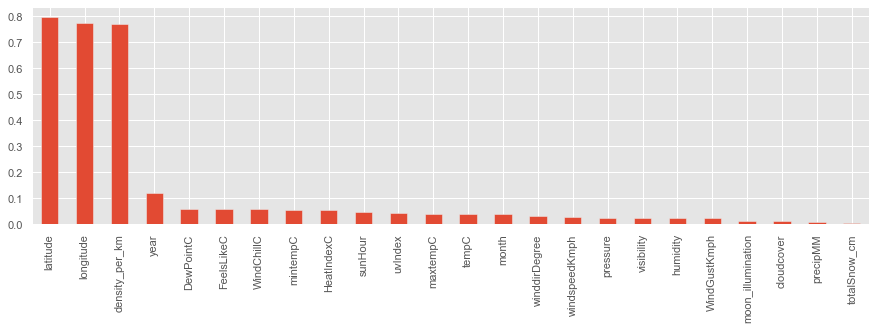

In [19]:
mutual_data.sort_values(ascending=False).plot.bar(figsize=(15,4))

In [20]:
from sklearn.feature_selection import SelectKBest
select_col = SelectKBest(mutual_info_classif,k=24)
select_col.fit(X,y)
X.columns[select_col.get_support()]

Index(['latitude', 'longitude', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'year', 'month', 'density_per_km', 'precipMM'],
      dtype='object')

## 3. XGBoost

[0.0855759  0.04310305 0.10366858 0.03409354 0.00052314 0.06395987
 0.0280664  0.04097275 0.05716718 0.02858397 0.00164909 0.04693686
 0.04820725 0.070554   0.07354703 0.01106824 0.         0.0036944
 0.06193847 0.00838888 0.08565594 0.03558173 0.05732071 0.00974303]


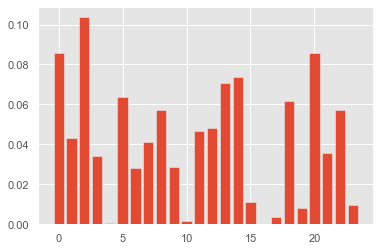

In [21]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBRegressor 
from matplotlib import pyplot

# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [22]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)

maxtempC             0.103669
year                 0.085656
latitude             0.085576
humidity             0.073547
cloudcover           0.070554
sunHour              0.063960
winddirDegree        0.061938
density_per_km       0.057321
DewPointC            0.057167
WindGustKmph         0.048207
WindChillC           0.046937
longitude            0.043103
moon_illumination    0.040973
month                0.035582
mintempC             0.034094
FeelsLikeC           0.028584
uvIndex              0.028066
pressure             0.011068
precipMM             0.009743
windspeedKmph        0.008389
visibility           0.003694
HeatIndexC           0.001649
totalSnow_cm         0.000523
tempC                0.000000
dtype: float32

<AxesSubplot:>

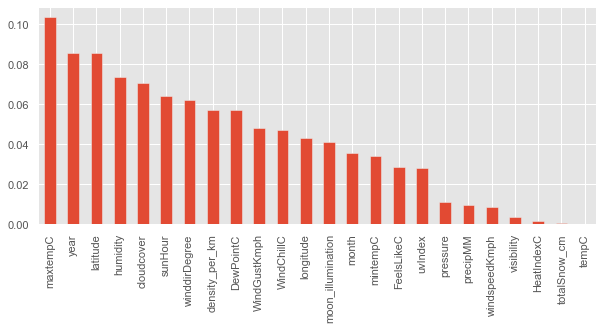

In [23]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [24]:
len(df.columns)

25